# Customer Lifetime Value Prediction (CLVP)

## Objective

In this project, we use the Online Retail Dataset to predict **Customer Lifetime Value (CLV)** — the total revenue a customer will bring to the business.

---

## Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Loading Dataset](#loading-dataset)
3. [Data Cleaning](#data-cleaning)
4. [Feature Engineering](#feature-engineering)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
6. [Model Training](#model-training)
7. [Evaluation](#evaluation)
8. [Conclusion](#conclusion)


## 1. Importing Libraries
## importing-libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


## 2. Loading Dataset
## loading-dataset

In [24]:
df = pd.read_excel('OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df.shape

(541909, 8)

## 3. Data Cleaning
## data-cleaning

In [28]:
df = df.dropna(subset=['CustomerID'])

In [30]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
df.shape

(397884, 9)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [40]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


## 4. Feature Engineering
## feature-engineering

In [104]:
# snapshot_date = df['InvoiceDate'].max()
# clv_df = df.groupby('CustomerID').agg({
#     'InvoiceNo': 'nunique',
#     'TotalPrice': 'sum',
#     'InvoiceDate': [np.min, np.max]
# })
# clv_df.columns = ['Frequency', 'MonetaryValue', 'FirstPurchase', 'LastPurchase']
# clv_df['Recency'] = (snapshot_date - clv_df['LastPurchase']).dt.days
# clv_df['CLV'] = clv_df['MonetaryValue']
# clv_df = clv_df[['Frequency', 'Recency', 'MonetaryValue', 'CLV']]

In [48]:
# clv_df.head()

,Frequency,Recency,MonetaryValue,CLV
CustomerID,,,,
12346.0,1,325,77183.60,77183.60
12347.0,7,1,4310.00,4310.00
12348.0,4,74,1797.24,1797.24
12349.0,1,18,1757.55,1757.55
12350.0,1,309,334.40,334.40


In [80]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Drop null CustomerIDs and filter positive values
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# 1. Revenue per customer
revenue = df.groupby('CustomerID')['TotalPrice'].sum()

# 2. Orders per customer
orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

# 3. Average Order Value
aov = revenue / orders

# 4. Purchase frequency = Orders / Total unique customers
purchase_frequency = orders / df['CustomerID'].nunique()

# 5. Lifespan = last - first invoice in months
customer_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
lifespan = (customer_dates['max'] - customer_dates['min']).dt.days / 30

# 6. Final CLV DataFrame
clv_df = pd.DataFrame({
    'AOV': aov,
    'Frequency': purchase_frequency,
    'Lifespan': lifespan
})
clv_df['CLV'] = clv_df['AOV'] * clv_df['Frequency'] * clv_df['Lifespan']

clv_df = clv_df.dropna()
clv_df.head()


,AOV,Frequency,Lifespan,CLV
CustomerID,,,,
12346.0,77183.600000,0.000231,0.000000,0.000000
12347.0,615.714286,0.001614,12.166667,12.088136
12348.0,449.310000,0.000922,9.400000,3.894434
12349.0,1757.550000,0.000231,0.000000,0.000000
12350.0,334.400000,0.000231,0.000000,0.000000


## 5. Exploratory Data Analysis (EDA)
## exploratory-data-analysis-eda

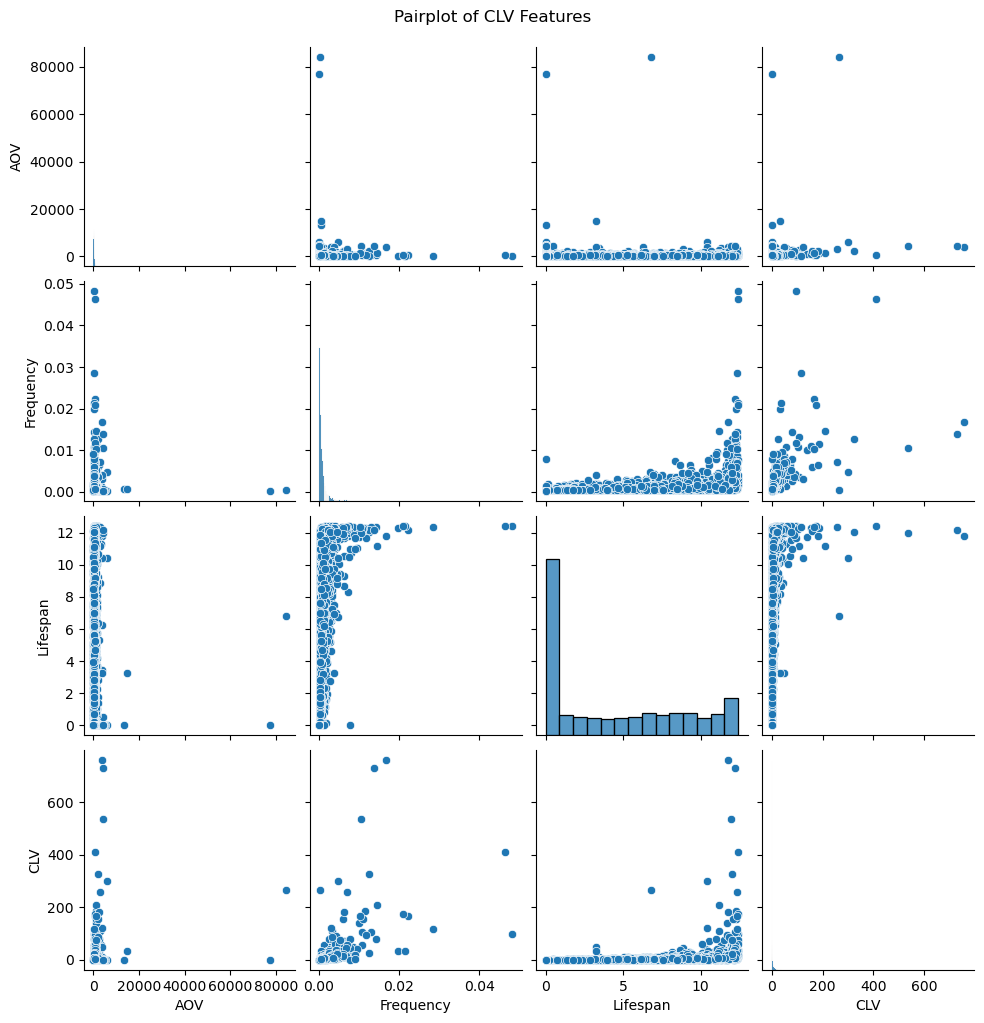

In [82]:
sns.pairplot(clv_df)
plt.suptitle("Pairplot of CLV Features", y=1.02)
plt.show()

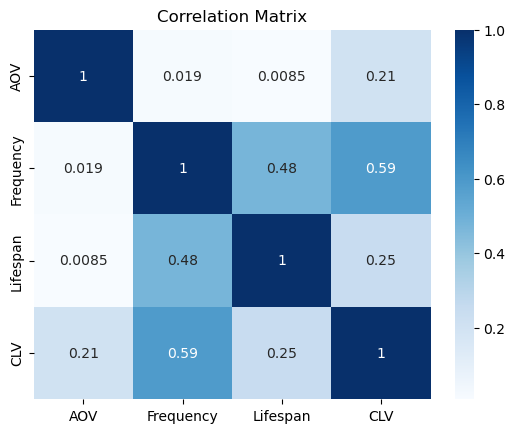

In [84]:
sns.heatmap(clv_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

## 6. Model Training
## model-training

In [102]:
# X = clv_df.drop('CLV', axis=1)
# y = clv_df['CLV']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Define X and y for model training
X = clv_df[['AOV', 'Frequency', 'Lifespan']]
y = clv_df['CLV']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_test)

## 7. Evaluation
## evaluation

In [96]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

MSE: 505.74
RMSE: 22.49
R² Score: 0.36


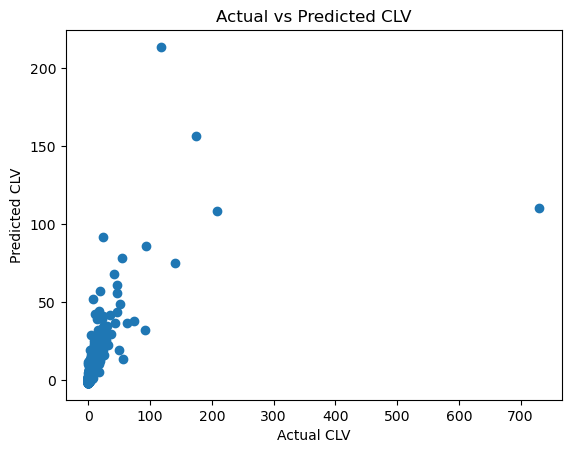

In [98]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted CLV")
plt.show()

In [72]:
# ----------------------
# Random Forest Regressor
# ----------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [74]:
# Evaluation of Random Forest
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest MSE: {rf_mse:.2f}')
print(f'Random Forest RMSE: {rf_rmse:.2f}')
print(f'Random Forest R² Score: {rf_r2:.2f}')


Random Forest MSE: 211728.83
Random Forest RMSE: 460.14
Random Forest R² Score: 1.00


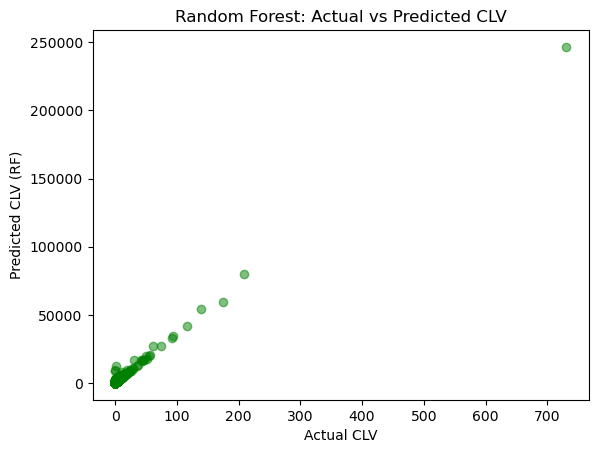

In [106]:

plt.scatter(y_test, y_rf_pred, alpha=0.5, color='green')
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV (RF)")
plt.title("Random Forest: Actual vs Predicted CLV")
plt.show()

## 8. Conclusion
## conclusion

This notebook trains a Linear Regression model to predict Customer Lifetime Value based on aggregated features.

In [100]:
import joblib

joblib.dump(model, 'clv_model.pkl')

['clv_model.pkl']